<center><h1>Chang_Yi_HW8</h1></center>

Name: Yi Chang
<br>
Github Username: Evangeline-Chang
<br>
USC ID: 1959039727

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [53]:
import pandas as pd
import numpy as np
import statistics
import random as rand
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from scipy.special import softmax

import warnings
warnings.filterwarnings("ignore")

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
data = pd.read_csv('../data/wdbc.data', header=None)

cols = ['ID', 'Diagnosis']
for i in range(1, 31):
    cols.append(f'A_{i}')

data.columns = cols
data.drop(columns=['ID'], inplace=True)
data["Diagnosis"] = data["Diagnosis"].map( {'M':-1, 'B':1} )
data.head()

,Diagnosis,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,...,A_21,A_22,A_23,A_24,A_25,A_26,A_27,A_28,A_29,A_30
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
pos = data[data['Diagnosis'] == 1]
neg = data[data['Diagnosis'] == -1]

X_pos = pos.drop(columns=['Diagnosis'])
X_neg = neg.drop(columns=['Diagnosis'])
y_pos = pos[['Diagnosis']]
y_neg = neg[['Diagnosis']]

### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

100%|██████████| 30/30 [00:11<00:00,  2.51it/s]


Average Accuracy: 0.970725
Average Precision: 0.973293
Average Recall: 0.980556
Average F1-Score: 0.976721
Average AUC: 0.991688


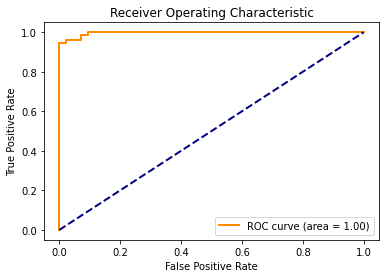

Confusion Matrix:
 [[42  1]
 [ 3 69]]


In [45]:
M = 30

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for _ in tqdm(range(M)):

    X_pos_train, X_pos_test, y_pos_train, y_pos_test = train_test_split(X_pos, y_pos, test_size=0.2)
    X_neg_train, X_neg_test, y_neg_train, y_neg_test = train_test_split(X_neg, y_neg, test_size=0.2)

    X_train = pd.concat([X_pos_train, X_neg_train], ignore_index=True) 
    X_test = pd.concat([X_pos_test, X_neg_test], ignore_index=True) 
    y_train = pd.concat([y_pos_train, y_neg_train], ignore_index=True) 
    y_test = pd.concat([y_pos_test, y_neg_test], ignore_index=True) 

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    parameters = [{'C': [0.1, 1, 10, 100, 1000]}]   
    clf = GridSearchCV(LinearSVC(penalty='l1', dual=False), parameters, cv=5)
    clf.fit(X_train, y_train)

    best_c = clf.best_params_['C']

    final_model = LinearSVC(penalty='l1', C=best_c, dual=False)
    final_model.fit(X_train, y_train)

    y_train_pred = final_model.predict(X_train)
    y_test_pred = final_model.predict(X_test)

    accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
    precision_train = metrics.precision_score(y_train, y_train_pred)
    recall_train = metrics.recall_score(y_train, y_train_pred)
    f1_train = metrics.f1_score(y_train, y_train_pred)
    auc_train = metrics.roc_auc_score(y_train, final_model.decision_function(X_train))

    accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
    precision_test = metrics.precision_score(y_test, y_test_pred)
    recall_test = metrics.recall_score(y_test, y_test_pred)
    f1_test = metrics.f1_score(y_test, y_test_pred)
    auc_test = metrics.roc_auc_score(y_test, final_model.decision_function(X_test))

    accuracy_list.append(accuracy_test)
    precision_list.append(precision_test)
    recall_list.append(recall_test)
    f1_list.append(f1_test)
    auc_list.append(auc_test)

average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)

print(f'\nAverage Accuracy: {average_accuracy:.6f}')
print(f'Average Precision: {average_precision:.6f}')
print(f'Average Recall: {average_recall:.6f}')
print(f'Average F1-Score: {average_f1:.6f}')
print(f'Average AUC: {average_auc:.6f}')

fpr, tpr, thresholds = roc_curve(y_test, final_model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

#### (ii) Semi-Supervised Learning/ Self-training

##### (A), (B)

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:11<00:00,  2.51it/s]


Average Accuracy: 0.970145
Average Precision: 0.965798
Average Recall: 0.987963
Average F1-Score: 0.976541
Average AUC: 0.991850


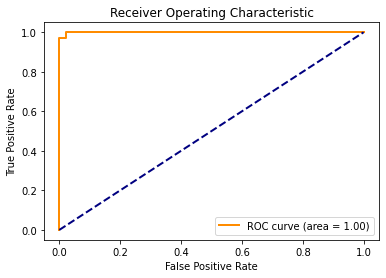

Confusion Matrix:
 [[40  3]
 [ 0 72]]


In [52]:
M = 30

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for _ in tqdm(range(M)):
    
    X_pos_train, X_pos_test, y_pos_train, y_pos_test = train_test_split(X_pos, y_pos, test_size=0.2)
    X_neg_train, X_neg_test, y_neg_train, y_neg_test = train_test_split(X_neg, y_neg, test_size=0.2)

    X_train = pd.concat([X_pos_train, X_neg_train], ignore_index=True) 
    X_test = pd.concat([X_pos_test, X_neg_test], ignore_index=True) 
    y_train = pd.concat([y_pos_train, y_neg_train], ignore_index=True) 
    y_test = pd.concat([y_pos_test, y_neg_test], ignore_index=True) 

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    parameters = [{'C': [0.1, 1, 10, 100, 1000]}]
    svm_model = GridSearchCV(LinearSVC(penalty='l1', dual=False), parameters, cv=5)
    svm_model.fit(X_train, y_train)

    best_c = svm_model.best_params_['C']

    unlabeled_indices = np.where(y_train.isna())[0] 
    while len(unlabeled_indices) > 0:   
        decision_values = svm_model.decision_function(X_train[unlabeled_indices])
        furthest_index = unlabeled_indices[np.argmax(np.abs(decision_values))]

        y_train.iloc[furthest_index] = np.sign(decision_values[np.argmax(np.abs(decision_values))])

        svm_model = LinearSVC(penalty='l1', dual=False, C=best_c)
        svm_model.fit(X_train, y_train)

        unlabeled_indices = np.arange(len(X_train))[y_train.isna()]

    y_train_pred = svm_model.predict(X_train)
    y_test_pred = svm_model.predict(X_test)

    accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
    precision_train = metrics.precision_score(y_train, y_train_pred)
    recall_train = metrics.recall_score(y_train, y_train_pred)
    f1_train = metrics.f1_score(y_train, y_train_pred)
    auc_train = metrics.roc_auc_score(y_train, svm_model.decision_function(X_train))

    accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
    precision_test = metrics.precision_score(y_test, y_test_pred)
    recall_test = metrics.recall_score(y_test, y_test_pred)
    f1_test = metrics.f1_score(y_test, y_test_pred)
    auc_test = metrics.roc_auc_score(y_test, svm_model.decision_function(X_test))

    accuracy_list.append(accuracy_test)
    precision_list.append(precision_test)
    recall_list.append(recall_test)
    f1_list.append(f1_test)
    auc_list.append(auc_test)

average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)

print(f'\nAverage Accuracy: {average_accuracy:.6f}')
print(f'Average Precision: {average_precision:.6f}')
print(f'Average Recall: {average_recall:.6f}')
print(f'Average F1-Score: {average_f1:.6f}')
print(f'Average AUC: {average_auc:.6f}')

fpr, tpr, thresholds = roc_curve(y_test, svm_model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

#### (iii) Unsupervised Learning

##### (A)

In [41]:
data = pd.read_csv('../data/wdbc.data', header=None)

cols = ['ID', 'Diagnosis']
for i in range(1, 31):
    cols.append(f'A_{i}')

data.columns = cols
data.drop(columns=['ID'], inplace=True)
data["Diagnosis"] = data["Diagnosis"].map( {'M':0, 'B':1} )
data.head()

pos = data[data['Diagnosis'] == 1]
neg = data[data['Diagnosis'] == 0]

X_pos = pos.drop(columns=['Diagnosis'])
X_neg = neg.drop(columns=['Diagnosis'])
y_pos = pos[['Diagnosis']]
y_neg = neg[['Diagnosis']]

M = 30
silhouette_scores = []

for _ in tqdm(range(M)):

    X_pos_train, X_pos_test, _, _ = train_test_split(X_pos, y_pos, test_size=0.2)
    X_neg_train, X_neg_test, _, _ = train_test_split(X_neg, y_neg, test_size=0.2)

    X_train = pd.concat([X_pos_train, X_neg_train], ignore_index=True) 
    X_test = pd.concat([X_pos_test, X_neg_test], ignore_index=True) 

    best_kmeans_model = None
    best_score = float('-inf')

    for _ in range(10):
        kmeans_model = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=rand.randint(0, 100))
        kmeans_model.fit(X_train)

        silhouette_score = metrics.silhouette_score(X_train, kmeans_model.labels_)
        silhouette_scores.append(silhouette_score)

        if silhouette_score > best_score:
            best_score = silhouette_score
            best_kmeans_model = kmeans_model

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:04<00:00,  6.96it/s]


By assigning `init='k-means++'`, it can spread out the initial cluster centers, reducing the likelihood of convergence to suboptimal solutions.
<br><br>Also, `n_init` is the number of times the k-means algorithm will be run with different centroid seeds. Increasing n_init increases the chances of finding a better solution, but it also increases computation time.

##### (B)

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:03<00:00,  8.71it/s]



Average Accuracy: 0.851542
Average Precision: 0.810209
Average Recall: 0.997310
Average F1-Score: 0.894043
Average AUC: 0.801515


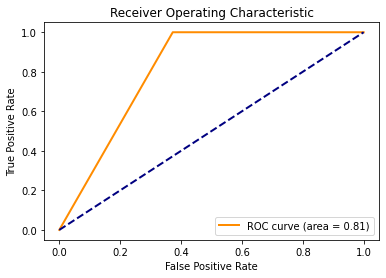

Confusion Matrix:
 [[106  63]
 [  0 285]]


In [44]:
M = 30

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for _ in tqdm(range(M)):

    X_pos_train, X_pos_test, y_pos_train, y_pos_test = train_test_split(X_pos, y_pos, test_size=0.2)
    X_neg_train, X_neg_test, y_neg_train, y_neg_test = train_test_split(X_neg, y_neg, test_size=0.2)

    X_train = pd.concat([X_pos_train, X_neg_train], ignore_index=True) 
    X_test = pd.concat([X_pos_test, X_neg_test], ignore_index=True) 
    y_train = pd.concat([y_pos_train, y_neg_train], ignore_index=True) 
    y_test = pd.concat([y_pos_test, y_neg_test], ignore_index=True) 

    best_kmeans_model = None
    best_score = float('-inf')

    for _ in range(10): 
        kmeans_model = KMeans(n_clusters=2, init='k-means++', n_init=5, random_state=rand.randint(0, 100))
        kmeans_model.fit(X_train)

        silhouette_score = metrics.silhouette_score(X_train, kmeans_model.labels_)

        if silhouette_score > best_score:
            best_score = silhouette_score
            best_kmeans_model = kmeans_model

    cluster_centers = best_kmeans_model.cluster_centers_

    nn = NearestNeighbors(n_neighbors=30)
    nn.fit(X_train)
    _, indices_cluster_1 = nn.kneighbors([cluster_centers[0]])
    _, indices_cluster_2 = nn.kneighbors([cluster_centers[1]])

    labels_cluster_1 = y_train.iloc[indices_cluster_1[0]].values
    labels_cluster_2 = y_train.iloc[indices_cluster_2[0]].values

    majority_poll_cluster_1 = np.sign(np.sum(labels_cluster_1))
    majority_poll_cluster_2 = np.sign(np.sum(labels_cluster_2))

    cluster_1_label = 1 if majority_poll_cluster_1 > 0 else 0
    cluster_2_label = 1 if majority_poll_cluster_2 > 0 else 0

    y_train_pred = np.where(best_kmeans_model.labels_ == 0, cluster_1_label, cluster_2_label)

    accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
    precision_train = metrics.precision_score(y_train, y_train_pred)
    recall_train = metrics.recall_score(y_train, y_train_pred)
    f1_train = metrics.f1_score(y_train, y_train_pred)
    auc_train = metrics.roc_auc_score(y_train, y_train_pred)

    accuracy_list.append(accuracy_train)
    precision_list.append(precision_train)
    recall_list.append(recall_train)
    f1_list.append(f1_train)
    auc_list.append(auc_train)

average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)

print(f'\nAverage Accuracy: {average_accuracy:.6f}')
print(f'Average Precision: {average_precision:.6f}')
print(f'Average Recall: {average_recall:.6f}')
print(f'Average F1-Score: {average_f1:.6f}')
print(f'Average AUC: {average_auc:.6f}')

fpr, tpr, thresholds = roc_curve(y_train, best_kmeans_model.labels_)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", conf_matrix)

##### (C)

100%|██████████| 30/30 [00:01<00:00, 17.00it/s]



Average Accuracy: 0.481449
Average Precision: 0.376942
Average Recall: 0.465278
Average F1-Score: 0.416410
Average AUC: 0.436881


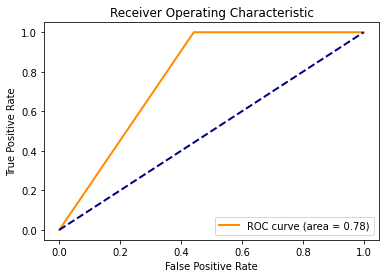

Confusion Matrix:
 [[24 19]
 [ 0 72]]


In [45]:
M = 30

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for _ in tqdm(range(M)):

    X_pos_train, X_pos_test, y_pos_train, y_pos_test = train_test_split(X_pos, y_pos, test_size=0.2)
    X_neg_train, X_neg_test, y_neg_train, y_neg_test = train_test_split(X_neg, y_neg, test_size=0.2)

    X_train = pd.concat([X_pos_train, X_neg_train], ignore_index=True) 
    X_test = pd.concat([X_pos_test, X_neg_test], ignore_index=True) 
    y_train = pd.concat([y_pos_train, y_neg_train], ignore_index=True) 
    y_test = pd.concat([y_pos_test, y_neg_test], ignore_index=True) 

    best_kmeans_model = None
    best_score = float('-inf')

    for _ in range(10): 
        kmeans_model = KMeans(n_clusters=2, init='k-means++', n_init=5, random_state=rand.randint(0, 100))
        kmeans_model.fit(X_train)

        silhouette_score = metrics.silhouette_score(X_train, kmeans_model.labels_)

        if silhouette_score > best_score:
            best_score = silhouette_score
            best_kmeans_model = kmeans_model

    cluster_centers = best_kmeans_model.cluster_centers_
    distances = np.vstack([np.linalg.norm(X_test - center, axis=1) for center in cluster_centers]).T

    softmax_scores = softmax(-distances, axis=1)
    y_test_pred = np.argmax(softmax_scores, axis=1)
    label_encoder = LabelEncoder()
    y_test_encoded = label_encoder.fit_transform(y_test)

    accuracy_test = metrics.accuracy_score(y_test_encoded, y_test_pred)
    precision_test = metrics.precision_score(y_test_encoded, y_test_pred)
    recall_test = metrics.recall_score(y_test_encoded, y_test_pred)
    f1_test = metrics.f1_score(y_test_encoded, y_test_pred)
    auc_test = metrics.roc_auc_score(y_test_encoded, softmax_scores[:, 1])

    accuracy_list.append(accuracy_test)
    precision_list.append(precision_test)
    recall_list.append(recall_test)
    f1_list.append(f1_test)
    auc_list.append(auc_test)

average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)

print(f'\nAverage Accuracy: {average_accuracy:.6f}')
print(f'Average Precision: {average_precision:.6f}')
print(f'Average Recall: {average_recall:.6f}')
print(f'Average F1-Score: {average_f1:.6f}')
print(f'Average AUC: {average_auc:.6f}')

fpr, tpr, thresholds = roc_curve(y_test_encoded, softmax_scores[:, 1])
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

conf_matrix = confusion_matrix(y_test_encoded, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

#### (iv) Spectral Clustering

Spectral Clustering: a technique used in machine learning and data analysis for clustering data points. Unlike traditional clustering algorithms, such as k-means, spectral clustering is not based on optimization of a distance metric but instead relies on the spectral properties (eigenvectors and eigenvalues) of a similarity graph built from the data.

100%|██████████| 30/30 [07:50<00:00, 15.67s/it]


Test Set Metrics:
Avg Precision: 0.25070517633797473
Avg Recall: 0.5001583657878551
Avg Accuracy: 0.37279040599069513
Avg F1-Score: 0.27268677023940485
Avg AUC: 0.5138888888888888


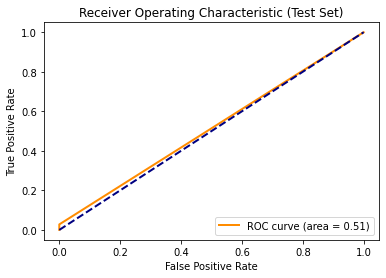


Confusion Matrix (Test Set):
 [[43  0]
 [70  2]]


In [48]:
M = 30

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

roc_auc = []

for m in tqdm(range(M)):

    X_pos_train, X_pos_test, y_pos_train, y_pos_test = train_test_split(X_pos, y_pos, test_size=0.2)
    X_neg_train, X_neg_test, y_neg_train, y_neg_test = train_test_split(X_neg, y_neg, test_size=0.2)

    X_train = pd.concat([X_pos_train, X_neg_train], ignore_index=True)
    X_test = pd.concat([X_pos_test, X_neg_test], ignore_index=True)
    y_train = pd.concat([y_pos_train, y_neg_train], ignore_index=True)
    y_test = pd.concat([y_pos_test, y_neg_test], ignore_index=True)

    sc = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1, n_init=100, random_state=rand.randint(0, 100))
    y_train_pred = sc.fit_predict(X_train)

    precision_list.append(precision_score(y_train, y_train_pred, average='macro'))
    recall_list.append(recall_score(y_train, y_train_pred, average='macro'))
    accuracy_list.append(accuracy_score(y_train, y_train_pred))
    f1_list.append(f1_score(y_train, y_train_pred, average='macro'))
    fpr, tpr, _ = roc_curve(y_train, y_train_pred)
    auc_list.append(auc(fpr, tpr))

y_test_pred = sc.fit_predict(X_test)
precision_list.append(precision_score(y_test, y_test_pred, average='macro'))
recall_list.append(recall_score(y_test, y_test_pred, average='macro'))
accuracy_list.append(accuracy_score(y_test, y_test_pred))
f1_list.append(f1_score(y_test, y_test_pred, average='macro'))
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc.append(auc(fpr, tpr))

print("\nTest Set Metrics:")
print("Avg Precision:", statistics.mean(precision_list))
print("Avg Recall:", statistics.mean(recall_list))
print("Avg Accuracy:", statistics.mean(accuracy_list))
print("Avg F1-Score:", statistics.mean(f1_list))
print("Avg AUC:", statistics.mean(roc_auc))

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(statistics.mean(roc_auc)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Test Set)')
plt.legend(loc='lower right')
plt.show()

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Set):\n", conf_matrix)

#### (iv) Compare

The findings indicate that employing supervised learning on the entire dataset yields superior outcomes compared to semi-supervised learning with only half of the dataset labeled. Moreover, it outperforms unsupervised learning, particularly if the labeling results differ from the clustering outcomes. Notably, while there isn't a substantial performance gap between supervised and semi-supervised learning, both methods exhibit longer execution times in comparison to the more expedient k-means algorithm.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [50]:
bank = pd.read_csv('../data/data_banknote_authentication.txt', names=['var', 'skew', 'cur', 'entropy', 'class'])
display(bank.head())

,var,skew,cur,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [65]:
error_df = pd.DataFrame()

for m in tqdm(range(0, 50)):
    accu = []

    test_data = bank.sample(472, random_state=rand.randint(0, 100))
    index_test = test_data.index
    
    train_data = bank.drop(index=index_test)
    test_data = test_data.reset_index(drop=True)
    test_data_x = test_data.drop('class', axis=1)
    test_data_y = test_data['class']

    accu_df = pd.DataFrame()

    i = StratifiedKFold(n_splits=90)

    train_data_x = train_data.drop(['class'], axis=1).reset_index(drop=True)
    train_data_y = train_data['class'].reset_index(drop=True)

    for train_index, test_index in i.split(train_data_x, train_data_y):
        split_10_x, split_10_y = train_data_x.iloc[test_index], train_data_y.iloc[test_index]
        temp_df = pd.concat([split_10_x, split_10_y], axis=1)
        accu_df = pd.concat([accu_df, temp_df], axis=0)

        accu_df_x = accu_df.drop('class', axis=1)
        accu_df_y = accu_df['class']

        parameters = [{'C': [0.001, 0.1, 1, 10, 100, 1000], 'max_iter': [2000]}]

        clf = GridSearchCV(LinearSVC(penalty='l1', loss='squared_hinge', dual=False), parameters, cv=5)
        clf.fit(accu_df_x, accu_df_y)

        pred_y = clf.predict(test_data_x)

        accu.append(accuracy_score(test_data_y, pred_y))

    column_values = pd.Series(accu)
    error_df.insert(loc=m, column=m, value=column_values)

svm_num = range(1, 91)
samples_num = list(range(10, 910, 10))
result_passive = pd.DataFrame({"SVM Number": svm_num, "Number of Samples": samples_num, "AVG Test Error": error_df.mean(axis=1)})
result_passive['AVG Test Error'] = result_passive['AVG Test Error'].apply(lambda x: 1 - x)
display(result_passive)

100%|██████████| 50/50 [10:33<00:00, 12.66s/it]


,SVM Number,Number of Samples,AVG Test Error
0,1,10,0.156949
1,2,20,0.074788
2,3,30,0.055339
3,4,40,0.035678
4,5,50,0.025339
...,...,...,...
85,86,860,0.010508
86,87,870,0.010466
87,88,880,0.010212
88,89,890,0.010381


#### (ii) Active

In [66]:
error_df = pd.DataFrame()

for m in tqdm(range(0, 50)):
    accu = []

    test_data = bank.sample(472, random_state=rand.randint(0, 100))
    index_test = test_data.index

    train_data = bank.drop(index=index_test)
    test_data = test_data.reset_index(drop=True)
    test_data_x = test_data.drop('class', axis=1)
    test_data_y = test_data['class']

    accu_df = pd.DataFrame()

    i = StratifiedKFold(n_splits=90)

    train_data_x = train_data.drop(['class'], axis=1).reset_index(drop=True)
    train_data_y = train_data['class'].reset_index(drop=True)

    pool = np.arange(len(train_data))

    for train_index, test_index in i.split(train_data_x, train_data_y):
        split_10_x, split_10_y = train_data_x.iloc[test_index], train_data_y.iloc[test_index]
        temp_df = pd.concat([split_10_x, split_10_y], axis=1)
        accu_df = pd.concat([accu_df, temp_df], axis=0)

        accu_df_x = accu_df.drop('class', axis=1)
        accu_df_y = accu_df['class']

        parameters = [{'C': [0.001, 0.1, 1, 10, 100, 1000], 'max_iter': [2000]}]

        clf = GridSearchCV(LinearSVC(penalty='l1', loss='squared_hinge', dual=False), parameters, cv=5)
        clf.fit(accu_df_x, accu_df_y)

        pred_y = clf.predict(test_data_x)

        accu.append(accuracy_score(test_data_y, pred_y))

        coefficients = clf.best_estimator_.coef_[0]
        distances = np.abs(np.dot(accu_df_x, coefficients) + clf.best_estimator_.intercept_)
        closest_indices = np.argsort(distances)[:10]

        pool = np.concatenate((pool, accu_df_x.index[closest_indices]))

    column_values = pd.Series(accu)
    error_df.insert(loc=m, column=m, value=column_values)

svm_num = range(1, 91)
samples_num = list(range(10, 910, 10))
result_active = pd.DataFrame({"SVM Number": svm_num, "Number of Samples": samples_num, "AVG Test Error": error_df.mean(axis=1)})
result_active['AVG Test Error'] = result_active['AVG Test Error'].apply(lambda x: 1 - x)
display(result_active)

100%|██████████| 50/50 [10:54<00:00, 13.10s/it]


,SVM Number,Number of Samples,AVG Test Error
0,1,10,0.162331
1,2,20,0.079153
2,3,30,0.063559
3,4,40,0.038051
4,5,50,0.024407
...,...,...,...
85,86,860,0.011144
86,87,870,0.011271
87,88,880,0.011144
88,89,890,0.011314


### (c) Average the 50 test errors

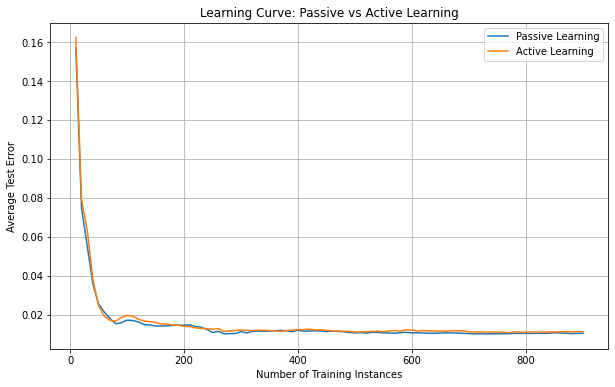

In [68]:
passive_avg_error = result_passive.groupby('Number of Samples')['AVG Test Error'].mean()
active_avg_error = result_active.groupby('Number of Samples')['AVG Test Error'].mean()

plt.figure(figsize=(10, 6))
plt.plot(passive_avg_error.index, passive_avg_error, label='Passive Learning')
plt.plot(active_avg_error.index, active_avg_error, label='Active Learning')
plt.title('Learning Curve: Passive vs Active Learning')
plt.xlabel('Number of Training Instances')
plt.ylabel('Average Test Error')
plt.legend()
plt.grid(True)
plt.show()